<a href="https://colab.research.google.com/github/pulkitporwal/PRODIGY_ML_02/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
print("Sample Data: ")
data.sample(15)

Sample Data: 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
20,21,Male,35,24,35
186,187,Female,54,101,24
126,127,Male,43,71,35
16,17,Female,35,21,35
164,165,Male,50,85,26
184,185,Female,41,99,39
172,173,Male,36,87,10
149,150,Male,34,78,90
5,6,Female,22,17,76
27,28,Male,35,28,61


In [ ]:
print("Data Info: ")
data.info()

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print("Data Description: ")
data.describe()

Data Description: 


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Exploratory Data Analysis

(array([ 46., 116.,  32.,   6.]),
 array([  0.,  40.,  80., 120., 160.]),
 <BarContainer object of 4 artists>)

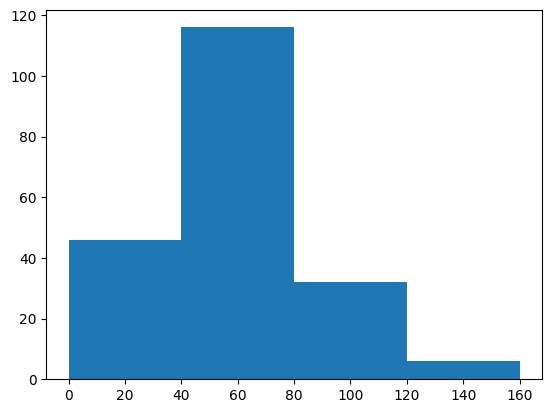

In [ ]:
plt.hist(data=data,x="Annual Income (k$)",bins=[0,40,80,120,160])

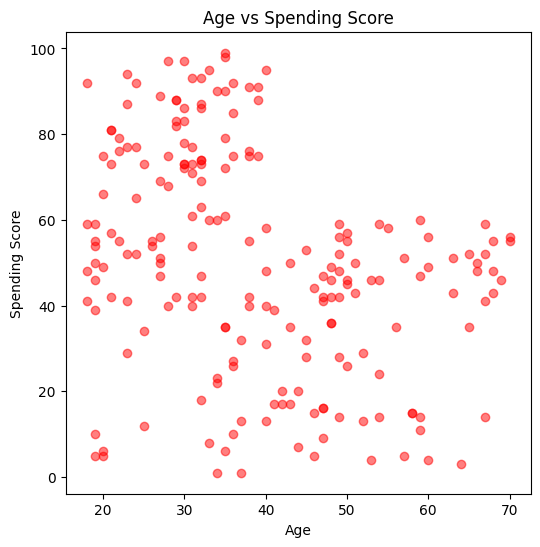

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data['Age'],data['Spending Score (1-100)'],c='r',alpha=0.5)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
X = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

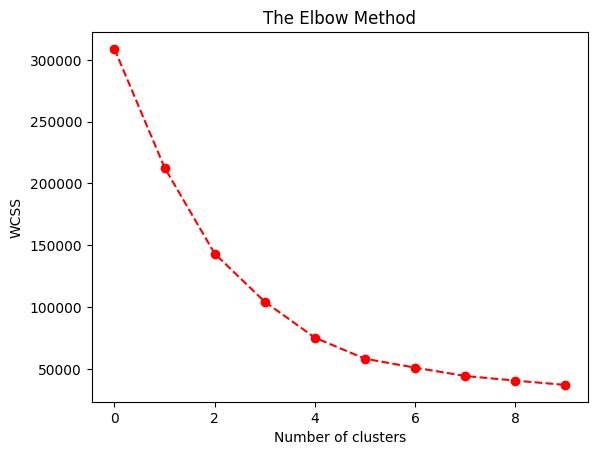

In [ ]:
plt.plot(wcss,linestyle="--",marker="o",color="red")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=1)
y_kmeans=kmeans.fit_predict(X)

#Inertia (wcss)
inertia=kmeans.inertia_
print(f"Inertia:{inertia}")

Inertia:104366.15145556197


In [ ]:
y_kmeans

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(X,y_kmeans)
silhouette_avg

0.44428597560893024

In [ ]:
data['Cluster']=y_kmeans

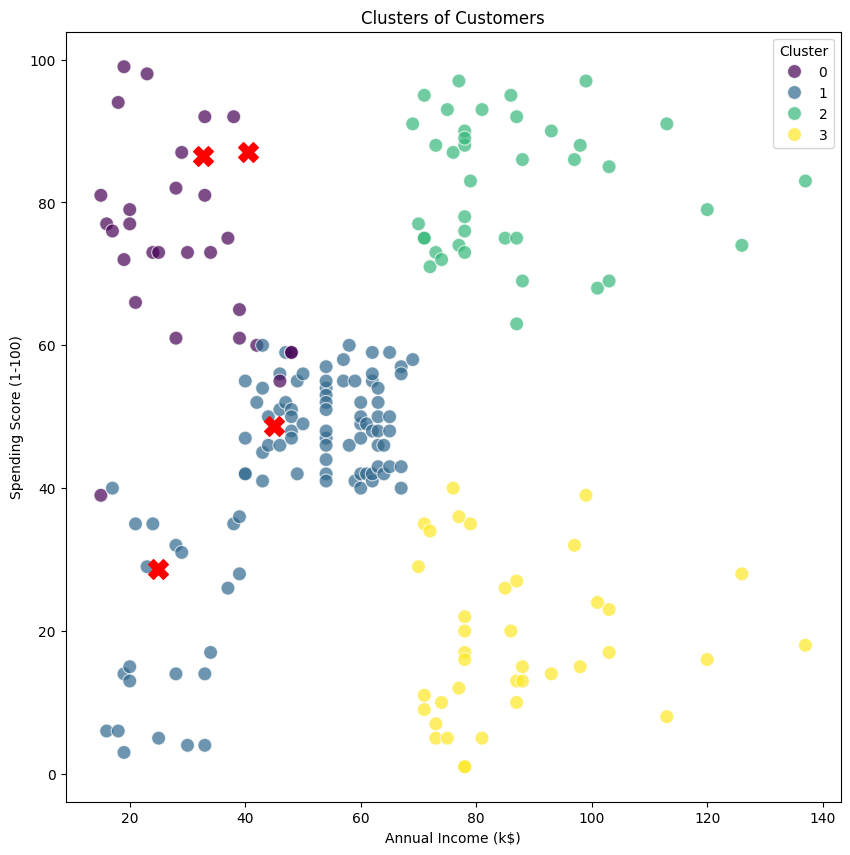

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='viridis',s=100,alpha=0.7)

center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='red',s=200,marker='X',label='Centroids')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()